enter the subjectneck tshirt
                                               Tweets
0   RT @FLai1234: Round N Round V Neck T Shirt htt...
1   💥Locryz Women's Summer Twist Knot Tshirt Dress...
2   Time and Tru V Neck Long Sleeve Semi Fitted #T...
3   Time and Tru Scoop Neck Elbow Length Sleeve Co...
4   RT @FLai1234: Round N Round V Neck T Shirt htt...
5   #Mossimo Supply Co. Short Sleeve V Neck #Tee #...
6   Tshirt Pax Lux Fashion https://t.co/JJAfsWGEPu...
7   Check out Myrtle Beach South Carolina Caribbea...
8   Mens Plain Basic Cotton VNeck V-Neck V Neck To...
9   Get amazing deals on byplay T-shirt in just on...
10  @Naje__ they got a tshirt out of me today, I a...
11  3D Cat Graphic Tee Cute Funny Animal Printed C...
12  Mens Basic Plain Cotton V-Neck VNeck Shirt Tee...
13  Aranoy Women Summer Casual Tshirt Dresses Beac...
14  RT @FLai1234: Round N Round V Neck T Shirt htt...
15  Womens Cotton Plain Basic Cotton Tshirt Shirt ...
16  Guess Crew Neck Short Sleeve Original Logo T-S...

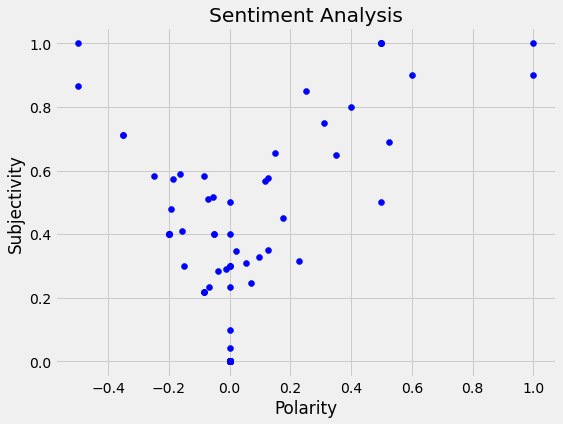

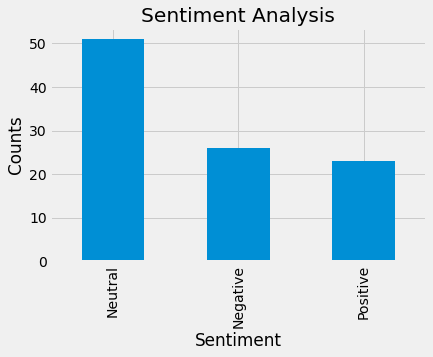

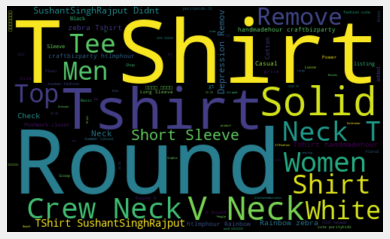

In [18]:
import tweepy
# import smtplib
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import re
from wordcloud import WordCloud
import pandas as pd
import smtplib
from email.message import  EmailMessage


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
consumer_key = "zvghpJLaBrHdUqloJDlcV7rum"
consumer_sec = "BKvbGtBlMBUPn9ONG1x7LrYkLclA2sRXT5G4KuGZiPgGlnNq2R"
access_token = "1383703955218132994-lz4OavJh4DLABqVo4SBnjzqSWw72vE"
access_token_sec = "oj254ngv1FjYnVveQOL1SQuRxOtR88xkROqaXSm8zalPQ"
# create an authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_sec)
# set the access token and access token secret
auth.set_access_token(access_token, access_token_sec)
# create an API object
api_connect = tweepy.API(auth)

text1 = input("enter the subject")
tweet_data = api_connect.search_tweets(text1,count=100)
df = pd.DataFrame([tweet.text for tweet in tweet_data], columns=['Tweets'])
print(df)
def cleantxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+','', text)
    text = re.sub(r'https?:\/\/\S+','',text)
    return text
df['Tweets'] = df['Tweets'].apply(cleantxt)
# function to get subjectivity
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# function to get polarity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity


df['Subjectivity'] = df['Tweets'].apply(getsubjectivity)
df['Polarity'] = df['Tweets'].apply(getpolarity)
# function to get analysis
def getAnalysis(x): #polarity
    if (x < 0):
        return 'Negative'
    elif (x == 0):
        return 'Neutral'
    elif (x > 0):
        return 'Positive'


df['Analysis'] = df['Polarity'].apply(getAnalysis)
# plot the graph between Subjectivity and polarity
plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
 plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

#plotting of wordcloud
wrds=' '.join([twts for twts in df['Tweets']])
wrds=wrds+"Round id Round a Round ,Round op Round . Round sd Round ok Round plo Round a Round hj Round lp Round jh  Round Round Round Round Round q Round vb Round rr Round io Round lp Round gf Round hj Round okj Round ddf Round oi Round Round  Solid id Solid a Solid ,Solid op Solid . Solid sd Solid ok Solid plo Solid a Solid hj Solid lp Solid jh  Solid Solid Solid Solid Solid q Solid vb Solid rr Solid io Solid lp Solid gf Solid hj Solid okj Solid ddf Solid oi Solid Solid  "
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(wrds)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()
df.to_csv('sentimental_analysis.csv', header=False, index=False)

In [19]:
dff=pd.read_csv('tshirts_csv_final.csv')
dff.head()

,Unnamed: 0,URL,id,desc,stars,num_ratings,num_reviews,reviews,vader_score,final_score
0,9.0,http://flipkart.com/helmont-color-block-men-ho...,9.0,"Color Block Men Hooded Neck Red, Black T-Shirt",4.0,301659.0,35479.0,nice nyc material 👌 awesome dress and good qua...,2.2165,0.303391
1,81.0,http://flipkart.com/fastcolors-solid-men-round...,81.0,Solid Men Round Neck Brown T-Shirt,4.0,163245.0,18182.0,looking good nice nice dress,1.2834,0.136050
2,159.0,http://flipkart.com/roden-striped-men-round-ne...,159.0,Striped Men Round Neck Yellow T-Shirt,4.0,78734.0,8405.0,best h nice t shart i really like it is too ...,3.2104,0.088638
3,362.0,http://flipkart.com/allen-solly-solid-men-polo...,362.0,Solid Men Polo Neck Green T-Shirt,4.2,86977.0,8030.0,nice good one amazing product in perfect prize,2.5303,0.086743
4,374.0,http://flipkart.com/fastcolors-solid-men-round...,374.0,Solid Men Round Neck Multicolor T-Shirt,3.9,70993.0,8765.0,nice one👌 nice product i impressed perfect,2.6213,0.076833


In [31]:
dff=dff.dropna()
dff=dff.reset_index(drop=True)

In [32]:
dff.tail()

,Unnamed: 0,URL,id,desc,stars,num_ratings,num_reviews,reviews,vader_score,final_score
201,303.0,http://flipkart.com/allen-solly-solid-men-polo...,303.0,Solid Men Polo Neck White T-Shirt,4.1,23.0,2.0,everything good very good nice,1.3023,0.000018
202,355.0,http://flipkart.com/van-heusen-academy-self-de...,355.0,Self Design Men Polo Neck Light Green T-Shirt,4.2,18.0,2.0,awesome t shirt fitting is good 😊 very nice,2.2052,0.000018
203,286.0,http://flipkart.com/metronaut-color-block-men-...,286.0,Color Block Men Polo Neck Multicolor T-Shirt,4.3,19.0,2.0,nice good,0.8619,0.000015
204,253.0,http://flipkart.com/u-s-polo-assn-solid-men-ne...,253.0,Solid Men Polo Neck Orange T-Shirt,4.3,22.0,1.0,its awesm,0.0000,0.000015
205,380.0,http://flipkart.com/jack-jones-printed-men-rou...,380.0,Printed Men Round Neck Black T-Shirt,3.8,20.0,1.0,looking sexy tishrit,0.5267,0.000013


In [37]:
a=""

In [39]:
for i in range(0,len(dff)):
    a=a+str(dff['desc'][i])

In [40]:
a

'Color Block Men Hooded Neck Red, Black T-ShirtSolid Men Round Neck Brown T-ShirtStriped Men Round Neck Yellow T-ShirtSolid Men Polo Neck Green T-ShirtSolid Men Round Neck Multicolor T-ShirtSolid Men Hooded Neck Black T-ShirtSolid Men Round Neck Black T-ShirtColor Block Men Round Neck Grey T-ShirtPack of 2 Color Block Men Round Neck Pink, Black T-ShirtStriped Men Round Neck Blue T-ShirtSolid Men V Neck Blue, Grey T-ShirtStriped Men Round Neck Maroon, Grey T-ShirtPrinted Men Hooded Neck Black T-ShirtSolid Men Mandarin Collar Brown, Black T-ShirtColor Block Men Round Neck Maroon, Beige T-ShirtPack of 3 Solid Men Round Neck Multicolor T-ShirtColor Block Men Round Neck Multicolor T-ShirtSolid Men Mandarin Collar Maroon T-ShirtPack of 3 Solid Men Round Neck Black, Dark Blue, Blue T-ShirtSolid Men Round Neck Green T-ShirtStriped Men Round Neck Yellow, Black T-ShirtColor Block Men Hooded Neck Multicolor T-ShirtPack of 2 Solid Men Round Neck Green, Black T-ShirtColor Block Men Round Neck Yello

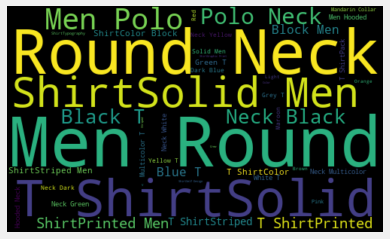

In [41]:
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(a)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

enter the subjectskirts
                                               Tweets
0   @irlcocopuffz slay but my school has ankle len...
1   @bobpockrass @TheBenCrazy I thought they did s...
2   RT @HiroshiVtuber: #迪奥文化挪用抗议 #Dior抄袭\nChinese ...
3   @edelgardlesbian her wardrobe was just these s...
4   Almost one year ago i dressed up in blazers an...
5   RT @HiroshiVtuber: #迪奥文化挪用抗议 #Dior抄袭\nChinese ...
6   RT @CyclingInASkirt: Women #Cyclists in Skirts...
7   Almost my birthday so I bought cute skirts n t...
8   @anthony_coon @fahgettaboudit2 @SteveDeaceShow...
9   RT @CyclingInASkirt: Women #Cyclists in Skirts...
10  @julie_kelly2 @BowerDA222 Blowing smoke up our...
11  In many countries men wear dresses  or skirts ...
12  If I wear tracksuit bottoms and trainers and d...
13  RT @archive444s: skirts should be the size of ...
14  @awa_khiwe Eish those skirts ngangiziha2ukela ...
15  初中生和国际中学高中生爱情：\nShe wears high heels, \nI wear...
16  @JonFlan In 1989 we sailed into Apia, Western ...
17  

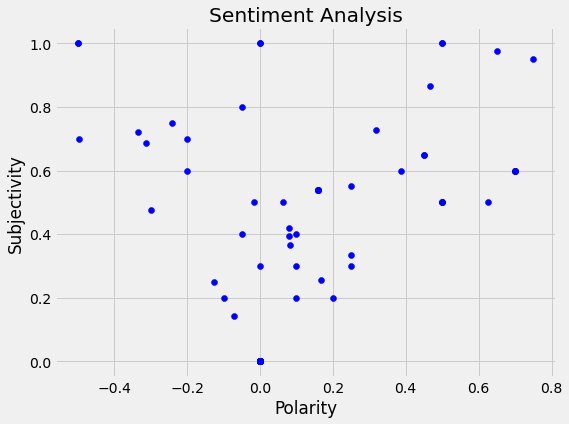

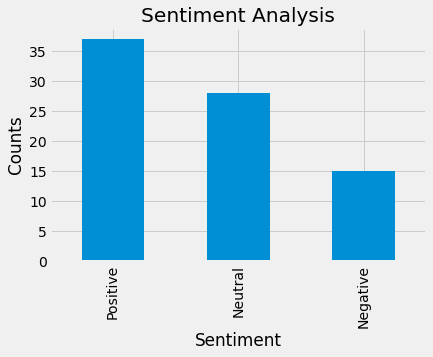

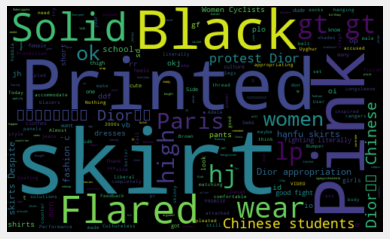

In [59]:
import tweepy
# import smtplib
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import re
from wordcloud import WordCloud
import pandas as pd
import smtplib
from email.message import  EmailMessage


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
consumer_key = "zvghpJLaBrHdUqloJDlcV7rum"
consumer_sec = "BKvbGtBlMBUPn9ONG1x7LrYkLclA2sRXT5G4KuGZiPgGlnNq2R"
access_token = "1383703955218132994-lz4OavJh4DLABqVo4SBnjzqSWw72vE"
access_token_sec = "oj254ngv1FjYnVveQOL1SQuRxOtR88xkROqaXSm8zalPQ"
# create an authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_sec)
# set the access token and access token secret
auth.set_access_token(access_token, access_token_sec)
# create an API object
api_connect = tweepy.API(auth)

text1 = input("enter the subject")
tweet_data = api_connect.search_tweets(text1,count=100)
df = pd.DataFrame([tweet.text for tweet in tweet_data], columns=['Tweets'])
print(df)
def cleantxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+','', text)
    text = re.sub(r'https?:\/\/\S+','',text)
    return text
df['Tweets'] = df['Tweets'].apply(cleantxt)
# function to get subjectivity
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# function to get polarity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity


df['Subjectivity'] = df['Tweets'].apply(getsubjectivity)
df['Polarity'] = df['Tweets'].apply(getpolarity)
# function to get analysis
def getAnalysis(x): #polarity
    if (x < 0):
        return 'Negative'
    elif (x == 0):
        return 'Neutral'
    elif (x > 0):
        return 'Positive'


df['Analysis'] = df['Polarity'].apply(getAnalysis)
# plot the graph between Subjectivity and polarity
plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
 plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

#plotting of wordcloud
wrds=' '.join([twts for twts in df['Tweets']])
wrds=wrds+"Printed id Printed a Printed ,Printed op Printed . Printed sd Printed ok Printed plo Printed a Printed hj Printed lp Printed jh  Printed Printed Printed Printed Printed q Printed vb Printed rr Printed io Printed lp Printed gf Printed hj Printed okj Printed ddf Printed oi Printed Printed  Pink id Pink a Pink ,Pink op Pink . Pink sd Pink ok Pink plo Pink a Pink hj Pink lp Pink jh  Pink Pink Pink Pink Pink q Pink vb Pink rr Pink io Pink lp Pink gf Pink hj Pink okj Pink ddf Pink oi Pink Pink  Black id Black a Black ,Black op Black . Black sd Black ok Black plo Black a Black hj Black lp Black jh  Black Black Black Black Black q Black vb Black rr Black io Black lp Black gf Black hj Black okj Black ddf Black oi Black Black Flared id Flared a Flared ,Flared op Flared . Flared sd Flared ok Flared plo Flared a Flared hj Flared lp Flared jh  Flared Flared Flared Flared Flared q Flared vb Flared rr Flared io Flared lp Flared gf Flared hj Flared okj Flared ddf Flared oi Flared Flared  Solid id Solid a Solid ,Solid op Solid . Solid sd Solid ok Solid plo Solid a Solid hj Solid lp Solid jh  Solid Solid Solid Solid Solid q Solid vb Solid rr Solid io Solid lp Solid gf Solid hj Solid okj Solid ddf Solid oi Solid Solid   "
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(wrds)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()
df.to_csv('sentimental1_analysis.csv', header=False, index=False)

In [45]:
dfd=pd.read_csv('skirts_csv_final.csv')
dfd.head()

,Unnamed: 0,URL,id,desc,stars,num_ratings,num_reviews,reviews,vader_score,final_score
0,6,http://flipkart.com/montrez-solid-women-straig...,6,Women Solid Straight Dark Blue Skirt,4.1,6718,655,i love this product small sizethank you flipka...,3.4370,0.178536
1,9,http://flipkart.com/montrez-solid-women-straig...,9,Women Solid Straight Dark Blue Skirt,4.1,6718,655,i love this product small sizethank you flipka...,3.4370,0.178536
2,89,http://flipkart.com/montrez-solid-women-straig...,89,Women Solid Straight Dark Blue Skirt,4.1,6718,655,i love this product small sizethank you flipka...,3.4370,0.178536
3,118,http://flipkart.com/krishika-printed-women-fla...,118,Women Printed Flared Maroon Skirt,3.9,6204,714,its very nice i liked it good quality and colo...,3.6510,0.177821
4,33,http://flipkart.com/kotty-solid-women-straight...,33,Women Solid Straight Dark Blue Skirt,4.2,4699,545,amazing 🥳🍭 as expected 😍😍😍thank u so much flip...,4.8116,0.161588


In [46]:
dfd=dfd.dropna()
dfd=dfd.reset_index(drop=True)

In [47]:
dfd.tail()

,Unnamed: 0,URL,id,desc,stars,num_ratings,num_reviews,reviews,vader_score,final_score
266,177,http://flipkart.com/rajasthani-look-woven-wome...,177,Women Woven Gathered Light Green Skirt,3.7,3,1,superb,0.6249,0.000063
267,210,http://flipkart.com/rajasthani-look-woven-wome...,210,Women Woven Gathered Light Green Skirt,3.7,3,1,superb,0.6249,0.000063
268,241,http://flipkart.com/rajasthani-look-woven-wome...,241,Women Woven Gathered Light Green Skirt,3.7,3,1,superb,0.6249,0.000063
269,267,http://flipkart.com/rajasthani-look-woven-wome...,267,Women Woven Gathered Light Green Skirt,3.7,3,1,superb,0.6249,0.000063
270,302,http://flipkart.com/rajasthani-look-woven-wome...,302,Women Woven Gathered Light Green Skirt,3.7,3,1,superb,0.6249,0.000063


In [53]:
b=""

In [54]:
for i in range(0,len(dfd)):
    b=b+str(dfd['desc'][i])

In [55]:
b

'Women Solid Straight Dark Blue SkirtWomen Solid Straight Dark Blue SkirtWomen Solid Straight Dark Blue SkirtWomen Printed Flared Maroon SkirtWomen Solid Straight Dark Blue SkirtWomen Printed Flared Pink SkirtWomen Solid Pleated Green SkirtWomen Solid Pleated Red SkirtWomen Solid Pleated Grey SkirtWomen Solid Pleated Green SkirtWomen Solid Pleated Green SkirtWomen Solid Pleated Green SkirtWomen Solid Pleated Yellow SkirtWomen Solid Pleated Green SkirtWomen Solid Pleated Dark Blue SkirtWomen Solid A-line Light Blue SkirtWomen Solid A-line Blue SkirtWomen Solid A-line Blue SkirtWomen Solid A-line Dark Blue SkirtWomen Solid Pleated Maroon SkirtWomen Solid Pleated Black SkirtWomen Solid Regular Black SkirtWomen Solid Regular Maroon SkirtWomen Solid Pleated Black SkirtWomen Solid Pleated Pink SkirtWomen Solid Pleated Green SkirtWomen Printed Regular Maroon SkirtWomen Solid Flared Black SkirtWomen Solid Flared White SkirtWomen Solid Flared Black SkirtWomen Solid Flared Maroon SkirtWomen Soli

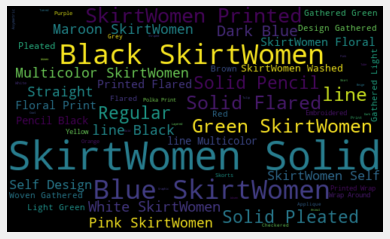

In [56]:
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(b)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

enter the subjectdresses
                                               Tweets
0   Hey, artists and modelers out there...\n\nI jo...
1   @MizerAndMoore I think it's one of the ladies ...
2   RT @SInow: Serena Williams surprised her daugh...
3   RT @feministhoe_: My aunt came to my house and...
4   RT @CindyKendrick11: I don't give a damn how m...
5   🌈 🌞 Color Me Happy. 🎀 💕Shine bright in Rosy Su...
6   RT @keilanadezignz: COSMIC BABES, “Savy Saturn...
7   RT @GbemiOkunlola: It’s been nearly 2 months s...
8   RT @AB_Philosopher: 57% OFF Sweetheart Off Sho...
9   RT @feministhoe_: My aunt came to my house and...
10  Just Hitched: Vegas Wedding Dresses\nAccessori...
11  RT @feministhoe_: My aunt came to my house and...
12  RT @LordJoeboto: summer dresses #ameliaRT #Fin...
13  🎉48 Hours Sale🎉-Don't Miss it!🎈\nGALAXY ROSE O...
14  Uplift your wardrobe with our exquisitely craf...
15  Your young attendant will be thrilled to wear ...
16  RT @feministhoe_: My aunt came to my house and...
17 

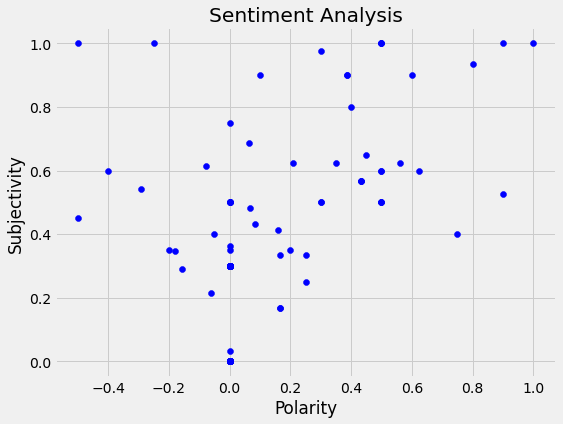

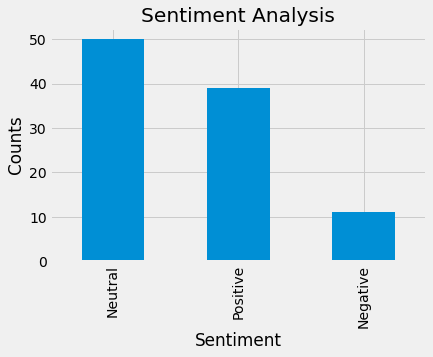

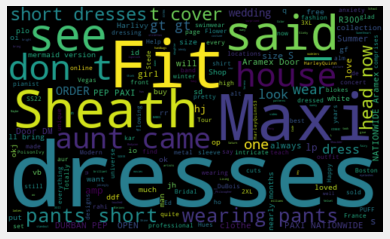

In [73]:
import tweepy
# import smtplib
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import re
from wordcloud import WordCloud
import pandas as pd
import smtplib
from email.message import  EmailMessage


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
consumer_key = "zvghpJLaBrHdUqloJDlcV7rum"
consumer_sec = "BKvbGtBlMBUPn9ONG1x7LrYkLclA2sRXT5G4KuGZiPgGlnNq2R"
access_token = "1383703955218132994-lz4OavJh4DLABqVo4SBnjzqSWw72vE"
access_token_sec = "oj254ngv1FjYnVveQOL1SQuRxOtR88xkROqaXSm8zalPQ"
# create an authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_sec)
# set the access token and access token secret
auth.set_access_token(access_token, access_token_sec)
# create an API object
api_connect = tweepy.API(auth)

text1 = input("enter the subject")
tweet_data = api_connect.search_tweets(text1,count=100)
df = pd.DataFrame([tweet.text for tweet in tweet_data], columns=['Tweets'])
print(df)
def cleantxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+','', text)
    text = re.sub(r'https?:\/\/\S+','',text)
    return text
df['Tweets'] = df['Tweets'].apply(cleantxt)
# function to get subjectivity
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# function to get polarity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity


df['Subjectivity'] = df['Tweets'].apply(getsubjectivity)
df['Polarity'] = df['Tweets'].apply(getpolarity)
# function to get analysis
def getAnalysis(x): #polarity
    if (x < 0):
        return 'Negative'
    elif (x == 0):
        return 'Neutral'
    elif (x > 0):
        return 'Positive'


df['Analysis'] = df['Polarity'].apply(getAnalysis)
# plot the graph between Subjectivity and polarity
plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
 plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

#plotting of wordcloud
wrds=' '.join([twts for twts in df['Tweets']])
wrds=wrds+"Fit id Fit a Fit ,Fit op Fit . Fit sd Fit ok Fit plo Fit a Fit hj Fit lp Fit jh  Fit Fit Fit Fit Fit q Fit vb Fit rr Fit io Fit lp Fit gf Fit hj Fit okj Fit ddf Fit oi Fit Fit  Maxi id Maxi a Maxi ,Maxi op Maxi . Maxi sd Maxi ok Maxi plo Maxi a Maxi hj Maxi lp Maxi jh  Maxi Maxi Maxi Maxi Maxi q Maxi vb Maxi rr Maxi io Maxi lp Maxi gf Maxi hj Maxi okj Maxi ddf Maxi oi Maxi Maxi  Sheath id Sheath a Sheath ,Sheath op Sheath . Sheath sd Sheath ok Sheath plo Sheath a Sheath hj Sheath lp Sheath jh  Sheath Sheath Sheath Sheath Sheath q Sheath vb Sheath rr Sheath io Sheath lp Sheath gf Sheath hj Sheath okj Sheath ddf Sheath oi Sheath Sheath  "
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(wrds)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()
df.to_csv('sentimental1_analysis2.csv', header=False, index=False)

In [62]:
ddd=pd.read_csv('dresses_csv_final.csv')
ddd.head()

,Unnamed: 0,URL,id,desc,stars,num_ratings,num_reviews,reviews,vader_score,final_score
0,2,http://flipkart.com/aayu-women-fit-flare-multi...,2,Women Fit and Flare Multicolor Dress,4.0,106335,15304,so comfortable dress in pregnancy time very d...,1.8009,0.253933
1,173,http://flipkart.com/kannan-women-maxi-multicol...,173,Women Maxi Multicolor Dress,3.8,35444,6065,in love wid thz product😍 perfect one ok ok pro...,3.0844,0.109535
2,17,http://flipkart.com/sheetal-associates-women-m...,17,Women Maxi Pink Dress,4.0,39659,5395,perfect fit good product really nice one very ...,2.2165,0.099607
3,14,http://flipkart.com/daevish-women-skater-black...,14,Women Skater Black Dress,4.3,26746,3706,one of my bestest purchase from flipkart 👌👌 lo...,2.8227,0.077442
4,123,http://flipkart.com/daevish-women-a-line-black...,123,Women A-line Black Dress,4.3,27104,5092,perfect❤️🔥 nice dress such a beautiful dress,1.3391,0.067440


In [63]:
ddd=ddd.dropna()
ddd=ddd.reset_index(drop=True)

In [64]:
ddd.tail()

,Unnamed: 0,URL,id,desc,stars,num_ratings,num_reviews,reviews,vader_score,final_score
322,321,http://flipkart.com/urbanic-women-a-line-white...,321,Women A-line White Dress,4.2,19,1,fabric is good dress is comfortable and pretty❤,1.7636,0.000038
323,226,http://flipkart.com/urbanic-women-gown-brown-d...,226,Women Gown Brown Dress,3.8,19,1,good,0.4404,0.000031
324,260,http://flipkart.com/urbanic-women-a-line-black...,260,Women A-line Black Dress,3.6,12,2,it was very preety dress one of the best dress...,1.6767,0.000027
325,325,http://flipkart.com/roadster-women-a-line-pink...,325,Women A-line Pink Dress,4.7,12,1,vry nyc,0.0000,0.000023
326,275,http://flipkart.com/sheetal-associates-women-b...,275,Women Bodycon Blue Dress,4.0,7,1,beautiful dress at this price,0.5994,0.000013


In [65]:
c=""

In [67]:
for i in range(0,len(ddd)):
    c=c+str(ddd['desc'][i])

In [68]:
c

'Women Fit and Flare Multicolor DressWomen Maxi Multicolor DressWomen Maxi Pink DressWomen Skater Black DressWomen A-line Black DressWomen Maxi White, Maroon, Black DressWomen Maxi Green DressWomen Fit and Flare Purple DressWomen Fit and Flare Purple DressWomen Fit and Flare Purple DressWomen Fit and Flare Purple DressWomen Fit and Flare Purple DressWomen Fit and Flare Purple DressWomen Fit and Flare Purple DressWomen Fit and Flare Purple DressWomen Fit and Flare Purple DressWomen Fit and Flare Purple DressWomen Maxi White, Beige DressWomen Maxi White, Beige DressWomen Fit and Flare Yellow Dress With MaskWomen Maxi Maroon, White DressWomen Maxi Black, White DressWomen Maxi Pink DressWomen Bodycon Blue DressWomen Fit and Flare Multicolor DressWomen Fit and Flare Black DressWomen Maxi Maroon DressWomen Maxi Black DressWomen Maxi Black DressWomen Maxi Blue DressWomen Fit and Flare Blue DressWomen Bodycon Black, Maroon, White DressWomen Bodycon Black DressWomen Wrap Maroon DressWomen Gathe

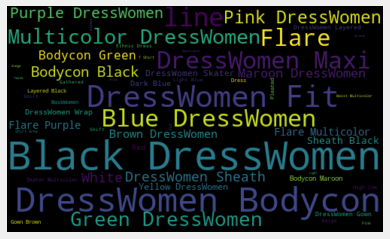

In [69]:
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(c)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()